In [1]:
import numpy as np
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import pymongo
import ipywidgets as wgt
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
import re
from datetime import datetime

%matplotlib inline

## Authentication keys
1. Go to https://apps.twitter.com/
2. Create an App (if you don't have one yet)
3. Grant read-only access to your account
4. Copy the four keys and paste them here:

In [25]:
api_key = "tDTMJtC7sAz39hEj4rX5vb0sJ" # <---- Add your API Key
api_secret = "5D9lXFpNr5Mpr8D4SQCak4pDH4NpzvyhmxXT4h5lxRYGqtfDHg" # <---- Add your API Secret
access_token = "1196013206-P6T1RgOl9Dwq70RUNXrczzjSxsuQtrlKimQBGmn" # <---- Add your access token
access_token_secret = "hBq8zik4WntPTB2hZEfSpVZNA0F7zAtj3mKjvb4GHyklz" # <---- Add your access token secret

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [29]:
results = []
query = ["earthquake"]
for tweet in tweepy.Cursor(api.search, q=query).items(1000):
    results.append(tweet)
    

TweepError: Twitter error response: status code = 429

In [23]:
def process_results(results):
    id_list = [tweet.id for tweet in results]
    data_set = pd.DataFrame(id_list, columns=["id"])

    # Processing Tweet Data

    data_set["text"] = [tweet.text for tweet in results]
    media = []
    expanded_url = []
    for tweet in results:
        if "media" in tweet.entities:
            for image in tweet.entities["media"]:
                media.append(image["media_url"])
                if 'video' in image["expanded_url"]:
                    expanded_url.append(image["expanded_url"]) 
                else:
                    expanded_url.append(None)
        else:
            media.append(None)
            expanded_url.append(None)
    data_set["media_url"] = media
    data_set["video_url"] = expanded_url
    
    data_set["created_at"] = [tweet.created_at for tweet in results]
    data_set["retweet_count"] = [tweet.retweet_count for tweet in results]
    data_set["favorite_count"] = [tweet.favorite_count for tweet in results]
    data_set["source"] = [tweet.source for tweet in results]

    # Processing User Data
    data_set["user_id"] = [tweet.author.id for tweet in results]
    data_set["user_screen_name"] = [tweet.author.screen_name for tweet in results]
    data_set["user_name"] = [tweet.author.name for tweet in results]
    data_set["user_created_at"] = [tweet.author.created_at for tweet in results]
    data_set["user_description"] = [tweet.author.description for tweet in results]
    data_set["user_followers_count"] = [tweet.author.followers_count for tweet in results]
    data_set["user_friends_count"] = [tweet.author.friends_count for tweet in results]
    data_set["user_location"] = [tweet.author.location for tweet in results]
    data_set["user_coordinates"] = [tweet.coordinates for tweet in results]

    return data_set
data_set = process_results(results)

In [31]:
data_set

,id,text,media_url,video_url,created_at,retweet_count,favorite_count,source,user_id,user_screen_name,user_name,user_created_at,user_description,user_followers_count,user_friends_count,user_location,user_coordinates
0,796821814508998656,RT @az_valentine: Haiti asks Clintons: Where's...,None,None,2016-11-10 21:08:19,14,0,Twitter Web Client,420879508,jlewis8817,lewis8817,2011-11-25 06:38:06,Sweeps and Sweeps,1453,2566,MS,None
1,796821787313049600,RT @Ccangelsing: Earthquake Valley of Dry Bone...,None,None,2016-11-10 21:08:12,8,0,Twitter for iPad,631538599,marshahorn66,Marsha Horn,2012-07-10 00:21:37,"Eat, Pray and Be Happy! (Only Jesus can do Jes...",28420,17774,,None
2,796821776273698816,"RT @UniofOxford: Political earthquake, the eco...",None,None,2016-11-10 21:08:10,20,0,Twitter for iPad,618057920,GreenhalghEL,Oxford Politics KE,2012-06-25 12:36:12,Knowledge Exchange and Impact at the Departmen...,171,277,Oxford,None
3,796821743163817984,RT @Britanniacomms: A scared panda holds onto ...,http://pbs.twimg.com/media/CFRoQ_ZWYAAOiTK.jpg,None,2016-11-10 21:08:02,18,0,Twitter for iPhone,3431241142,rubenoliva430,®**,2015-08-19 08:13:29,*ANTICOMUNISTA Y PATRIOTA.. *VIVA ESPAÑA !🇪🇸#L...,3331,3136,Madrid/Spain,None
4,796821701749338113,"Trump won’t win. In fact, the US could be on t...",None,None,2016-11-10 21:07:52,0,1,Twitter for iPad,24935003,mdj17,Dave Jones,2009-03-17 19:16:11,CHALLENGE HYPOCRISY! Christian Conservative Li...,68133,71007,"AL, USA",None
5,796821677707399168,Labrinth - earthquake ft. Tinie tempah 😩😍💦,None,None,2016-11-10 21:07:46,0,0,Twitter for iPhone,2482349527,particaI,ㅤㅤㅤ ㅤㅤㅤㅤㅤ ㅤㅤㅤ ɯoʇ,2014-05-07 15:37:51,ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤ ㅤㅤㅤㅤㅤㅤㅤㅤㅤ ㅤㅤㅤㅤㅤㅤㅤㅤㅤ ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤ ㅤ...,914,69,ㅤㅤㅤㅤㅤㅤ ♡,None
6,796821630580379649,"RT @MorganBesmer: This girl asked:\n""When has ...",None,None,2016-11-10 21:07:35,42,0,Twitter for iPhone,380155887,3gypti4n,marina,2011-09-26 05:04:24,messy hair and a messier life | feminist | #bl...,1133,513,university of texas ATX,None
7,796821535256231936,RT @zishin32555: 【地震情報】2016年11月11日 0時59分頃、鳥取県中...,None,None,2016-11-10 21:07:12,2,0,Twitter for Android,2793615912,AVE0704,若松っつん@ほぼRTと会話専用垢,2014-09-06 10:33:24,InstagramでポケモンGOの記録等をしてます。☞matsushotiku 山梨に住んで...,1325,1399,日本 山梨,None
8,796821513886310404,鳥取中部地震 全半壊８９棟 国に支援要請へ - NHK https://t.co/hFuY8...,http://pbs.twimg.com/media/Cw7g8VYVEAA6H4N.jpg,None,2016-11-10 21:07:07,0,0,dlvr.it,3012891656,EarthQuake_365,地震情報（News・予兆・前兆）,2015-02-08 01:55:49,地震情報、各種ニュースを中心に予兆、前兆までの情報を取り上げたいと思います。,656,568,,None
9,796821457464688641,RT @aspiesmom: @DavidCornDC Good day for Clint...,None,None,2016-11-10 21:06:54,2,0,Twitter Web Client,424047059,Landorcan,Jim,2011-11-29 07:50:27,If you follow me understand I am often using p...,1503,958,"Toronto, Ontario",None


/Users/shengliangdai/anaconda3/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/shengliangdai/anaconda3/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


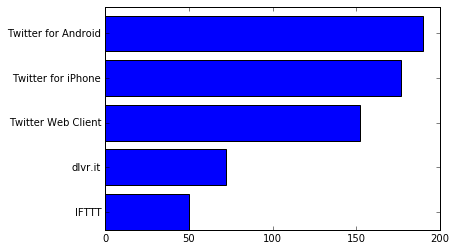

In [7]:
sources = data_set["source"].value_counts()[:5][::-1]

plt.barh(range(len(sources)), sources.values)
plt.yticks(np.arange(len(sources)) + 0.4, sources.index)
plt.show()

In [30]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(data_set.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50]

,word,count
0,earthquake,788
1,https,742
2,co,712
3,rt,480
4,the,331
5,of,313
6,in,190
7,to,190
8,10,166
9,11,136


In [9]:
tweet

Status(coordinates=None, possibly_sensitive=False, in_reply_to_status_id=None, geo=None, contributors=None, entities={'urls': [{'display_url': 'supernoder.com/newsium.php?re…', 'expanded_url': 'http://www.supernoder.com/newsium.php?ref=Earthquake+magnitude', 'indices': [75, 98], 'url': 'https://t.co/vuWhW4HUCk'}], 'hashtags': [], 'user_mentions': [], 'symbols': []}, favorite_count=0, lang='en', place=None, retweeted=False, text='"First responders rescue dog that was was trapped in rubble for 24 ho..."  https://t.co/vuWhW4HUCk', truncated=False, in_reply_to_status_id_str=None, user=User(is_translation_enabled=False, notifications=False, profile_link_color='0099CC', profile_background_image_url='http://pbs.twimg.com/profile_background_images/378800000093005395/5071c3190d7a4ee891032dd0f3f54ca9.png', statuses_count=164020, utc_offset=39600, profile_sidebar_fill_color='F6FFD1', listed_count=86, location='', description='Breaking News', profile_background_tile=False, profile_sidebar_border_c

In [32]:
data_set.to_csv("earthquake nov 10.csv")

AttributeError: 'dict' object has no attribute 'media'